<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("realest.c")
print(data.head())

   Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Separate the features and the target variable


In [11]:
 #Handle missing values by imputing with the median
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [14]:
# Separate the features and the target variable
X = data_imputed.drop("Price", axis=1)
y = data_imputed["Price"]
poly = PolynomialFeatures(degree=2)  # Adjust degree based on data
X_poly = poly.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')


MSE: 27.25300793559731, R2: 0.8588355617523641


In [26]:
import numpy as np
y_class = np.where(y > y.mean(), 1, 0)  # Example: 1 for high, 0 for low

# Assuming 'y' and 'y_test' are available from previous cells
y_class = np.where(y > y.mean(), 1, 0)  # Example: 1 for high, 0 for low

# Create y_test_class based on y_test
y_test_class = np.where(y_test > y.mean(), 1, 0)

# Assuming 'model' and 'X_test' are available from previous cells
y_pred = model.predict(X_test)

# Create y_pred_class based on y_pred
y_pred_class = np.where(y_pred > y.mean(), 1, 0)


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class) # Assuming you want to print accuracy

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.90625
Precision: 0.9444444444444444
Recall: 0.8947368421052632
F1 Score: 0.918918918918919


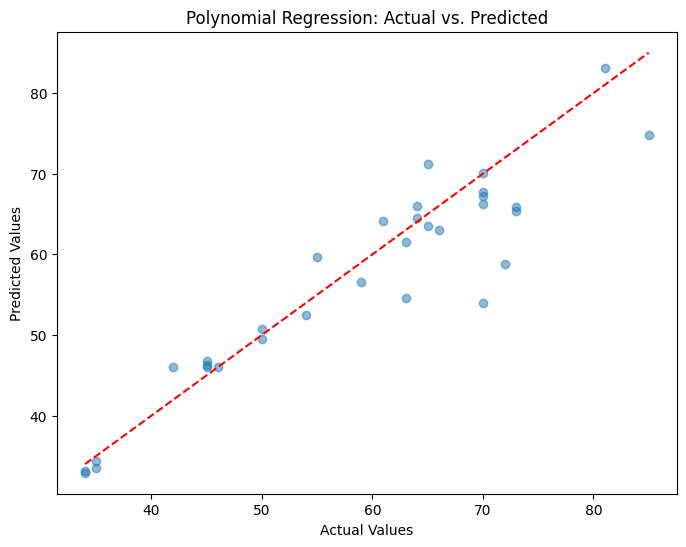

In [28]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are available from previous cells

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs. Predicted")
plt.show()